In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
from scipy import stats

In [2]:
# Configuration
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [3]:
# Set figure size defaults
plt.rcParams['figure.figsize'] = (12, 6)

In [10]:
df = pd.read_csv('../data/raw/data.csv')

In [11]:
print("="*80)
print("DATASET OVERVIEW")
print("="*80)

DATASET OVERVIEW


In [12]:
# Basic information
print(f"\nDataset Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print("\n" + "-"*80)


Dataset Shape: 95,662 rows × 16 columns

--------------------------------------------------------------------------------


In [13]:
# Display first few rows
print("\nFirst 5 Rows:")
print(df.head())


First 5 Rows:
         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_28195   BatchId_38780  AccountId_4841  SubscriptionId_3829   

        CustomerId CurrencyCode  CountryCode    ProviderId     ProductId  \
0  CustomerId_4406          UGX          256  ProviderId_6  ProductId_10   
1  CustomerId_4406          UGX          256  ProviderId_4   ProductId_6   
2  CustomerId_4683          UGX          256  ProviderId_6   ProductId_1   
3   CustomerId_988          UGX          256  ProviderId_1  ProductId_21   
4   CustomerId_988          UGX          256  ProviderId_4   ProductId_6   

      ProductCategory    ChannelId   Amount  Value  T

In [14]:
# Data types and non-null counts
print("\n" + "-"*80)
print("\nData Types and Non-Null Counts:")
print(df.info())


--------------------------------------------------------------------------------

Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  Transa

In [15]:
# Memory usage
print("\n" + "-"*80)
print(f"\nMemory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


--------------------------------------------------------------------------------

Memory Usage: 66.48 MB


In [16]:
## 2. Summary Statistics

print("\n" + "="*80)
print("SUMMARY STATISTICS")
print("="*80)


SUMMARY STATISTICS


In [17]:
# Numerical features summary
print("\nNumerical Features:")
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(df[numerical_cols].describe())


Numerical Features:
       CountryCode        Amount         Value  PricingStrategy   FraudResult
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000


In [18]:
# Categorical features summary
print("\n" + "-"*80)
print("\nCategorical Features:")
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols:
    print(f"\n{col}:")
    print(f"  Unique values: {df[col].nunique()}")
    print(f"  Most common: {df[col].mode().values[0] if len(df[col].mode()) > 0 else 'N/A'}")
    print(f"  Sample values: {df[col].unique()[:5]}")


--------------------------------------------------------------------------------

Categorical Features:

TransactionId:
  Unique values: 95662
  Most common: TransactionId_1
  Sample values: ['TransactionId_76871' 'TransactionId_73770' 'TransactionId_26203'
 'TransactionId_380' 'TransactionId_28195']

BatchId:
  Unique values: 94809
  Most common: BatchId_67019
  Sample values: ['BatchId_36123' 'BatchId_15642' 'BatchId_53941' 'BatchId_102363'
 'BatchId_38780']

AccountId:
  Unique values: 3633
  Most common: AccountId_4841
  Sample values: ['AccountId_3957' 'AccountId_4841' 'AccountId_4229' 'AccountId_648'
 'AccountId_1078']

SubscriptionId:
  Unique values: 3627
  Most common: SubscriptionId_3829
  Sample values: ['SubscriptionId_887' 'SubscriptionId_3829' 'SubscriptionId_222'
 'SubscriptionId_2185' 'SubscriptionId_4238']

CustomerId:
  Unique values: 3742
  Most common: CustomerId_7343
  Sample values: ['CustomerId_4406' 'CustomerId_4683' 'CustomerId_988' 'CustomerId_1432'
 'Custome

In [19]:
## 3. Distribution of Numerical Features

print("\n" + "="*80)
print("NUMERICAL FEATURE DISTRIBUTIONS")
print("="*80)


NUMERICAL FEATURE DISTRIBUTIONS



Amount Statistics:
  Mean: 6717.85
  Median: 1000.00
  Std Dev: 123306.80
  Skewness: 51.10
  Kurtosis: 3363.13

Value Statistics:
  Mean: 9900.58
  Median: 1000.00
  Std Dev: 123122.09
  Skewness: 51.29
  Kurtosis: 3378.07


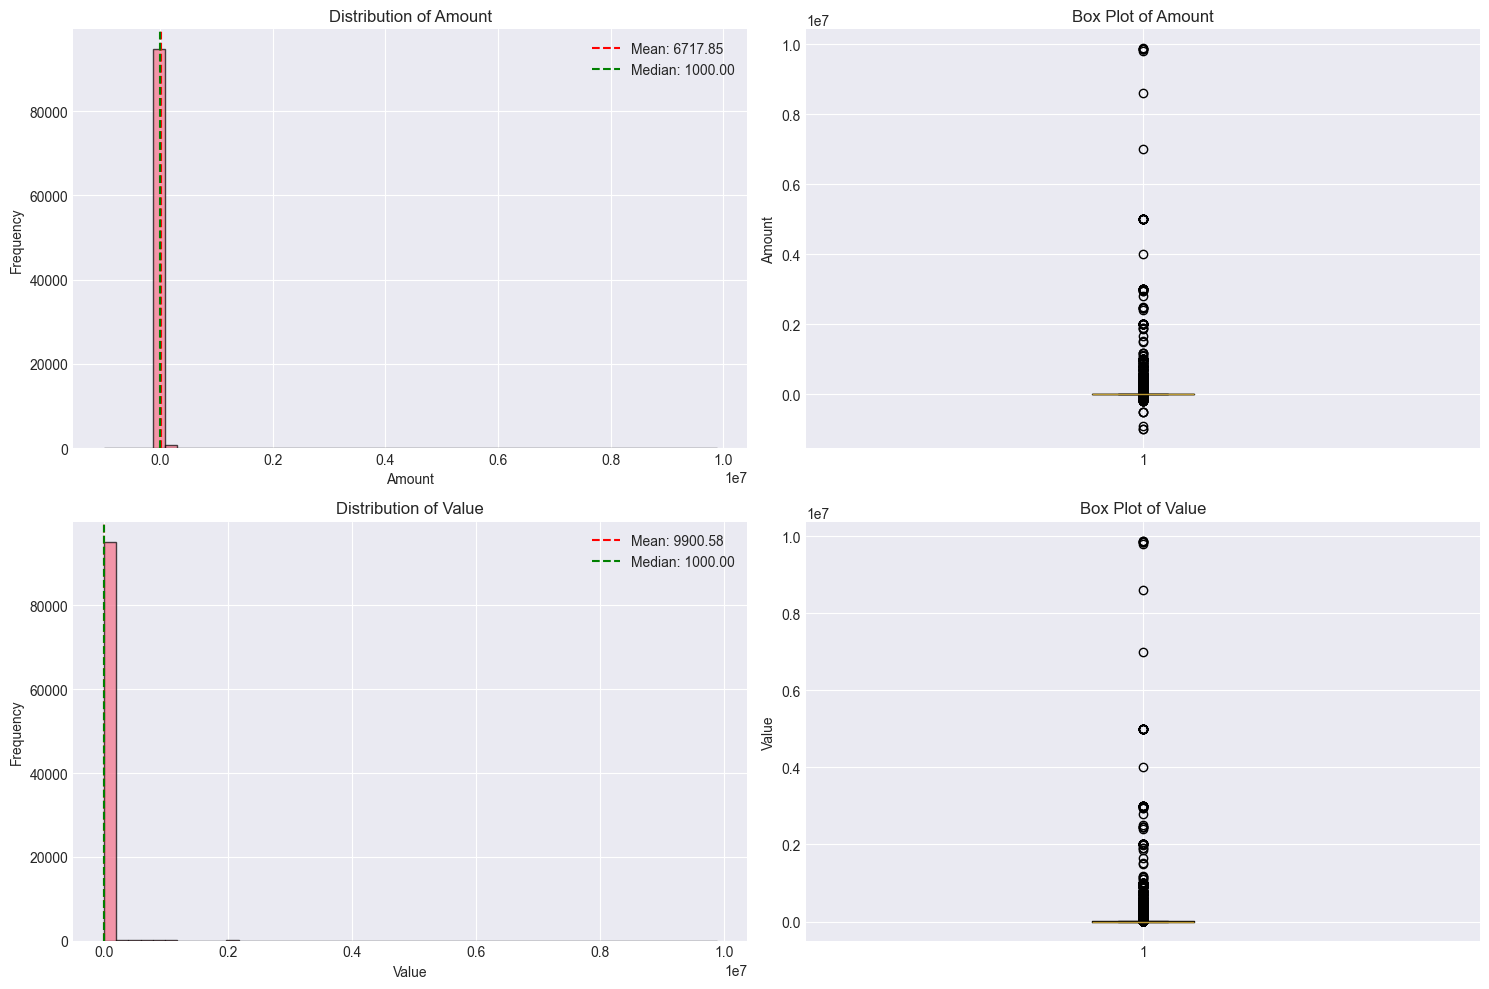

In [20]:
# Plot distributions for numerical features
numerical_cols = ['Amount', 'Value']  # Add other numerical columns as needed

fig, axes = plt.subplots(len(numerical_cols), 2, figsize=(15, 5*len(numerical_cols)))
if len(numerical_cols) == 1:
    axes = axes.reshape(1, -1)

for idx, col in enumerate(numerical_cols):
    # Histogram
    axes[idx, 0].hist(df[col].dropna(), bins=50, edgecolor='black', alpha=0.7)
    axes[idx, 0].set_title(f'Distribution of {col}')
    axes[idx, 0].set_xlabel(col)
    axes[idx, 0].set_ylabel('Frequency')
    axes[idx, 0].axvline(df[col].mean(), color='red', linestyle='--', 
                         label=f'Mean: {df[col].mean():.2f}')
    axes[idx, 0].axvline(df[col].median(), color='green', linestyle='--', 
                         label=f'Median: {df[col].median():.2f}')
    axes[idx, 0].legend()
    
    # Box plot
    axes[idx, 1].boxplot(df[col].dropna(), vert=True)
    axes[idx, 1].set_title(f'Box Plot of {col}')
    axes[idx, 1].set_ylabel(col)
    
    # Print statistics
    print(f"\n{col} Statistics:")
    print(f"  Mean: {df[col].mean():.2f}")
    print(f"  Median: {df[col].median():.2f}")
    print(f"  Std Dev: {df[col].std():.2f}")
    print(f"  Skewness: {df[col].skew():.2f}")
    print(f"  Kurtosis: {df[col].kurtosis():.2f}")

plt.tight_layout()
plt.show()


In [21]:
## 4. Distribution of Categorical Features

print("\n" + "="*80)
print("CATEGORICAL FEATURE DISTRIBUTIONS")
print("="*80)


CATEGORICAL FEATURE DISTRIBUTIONS



ProductCategory Distribution:
ProductCategory
financial_services    45405
airtime               45027
utility_bill           1920
data_bundles           1613
tv                     1279
ticket                  216
movies                  175
transport                25
other                     2
Name: count, dtype: int64
  Total unique values: 9

ChannelId Distribution:
ChannelId
ChannelId_3    56935
ChannelId_2    37141
ChannelId_5     1048
ChannelId_1      538
Name: count, dtype: int64
  Total unique values: 4

FraudResult Distribution:
FraudResult
0    95469
1      193
Name: count, dtype: int64
  Total unique values: 2

PricingStrategy Distribution:
PricingStrategy
2    79848
4    13562
1     1867
0      385
Name: count, dtype: int64
  Total unique values: 4

CountryCode Distribution:
CountryCode
256    95662
Name: count, dtype: int64
  Total unique values: 1

CurrencyCode Distribution:
CurrencyCode
UGX    95662
Name: count, dtype: int64
  Total unique values: 1


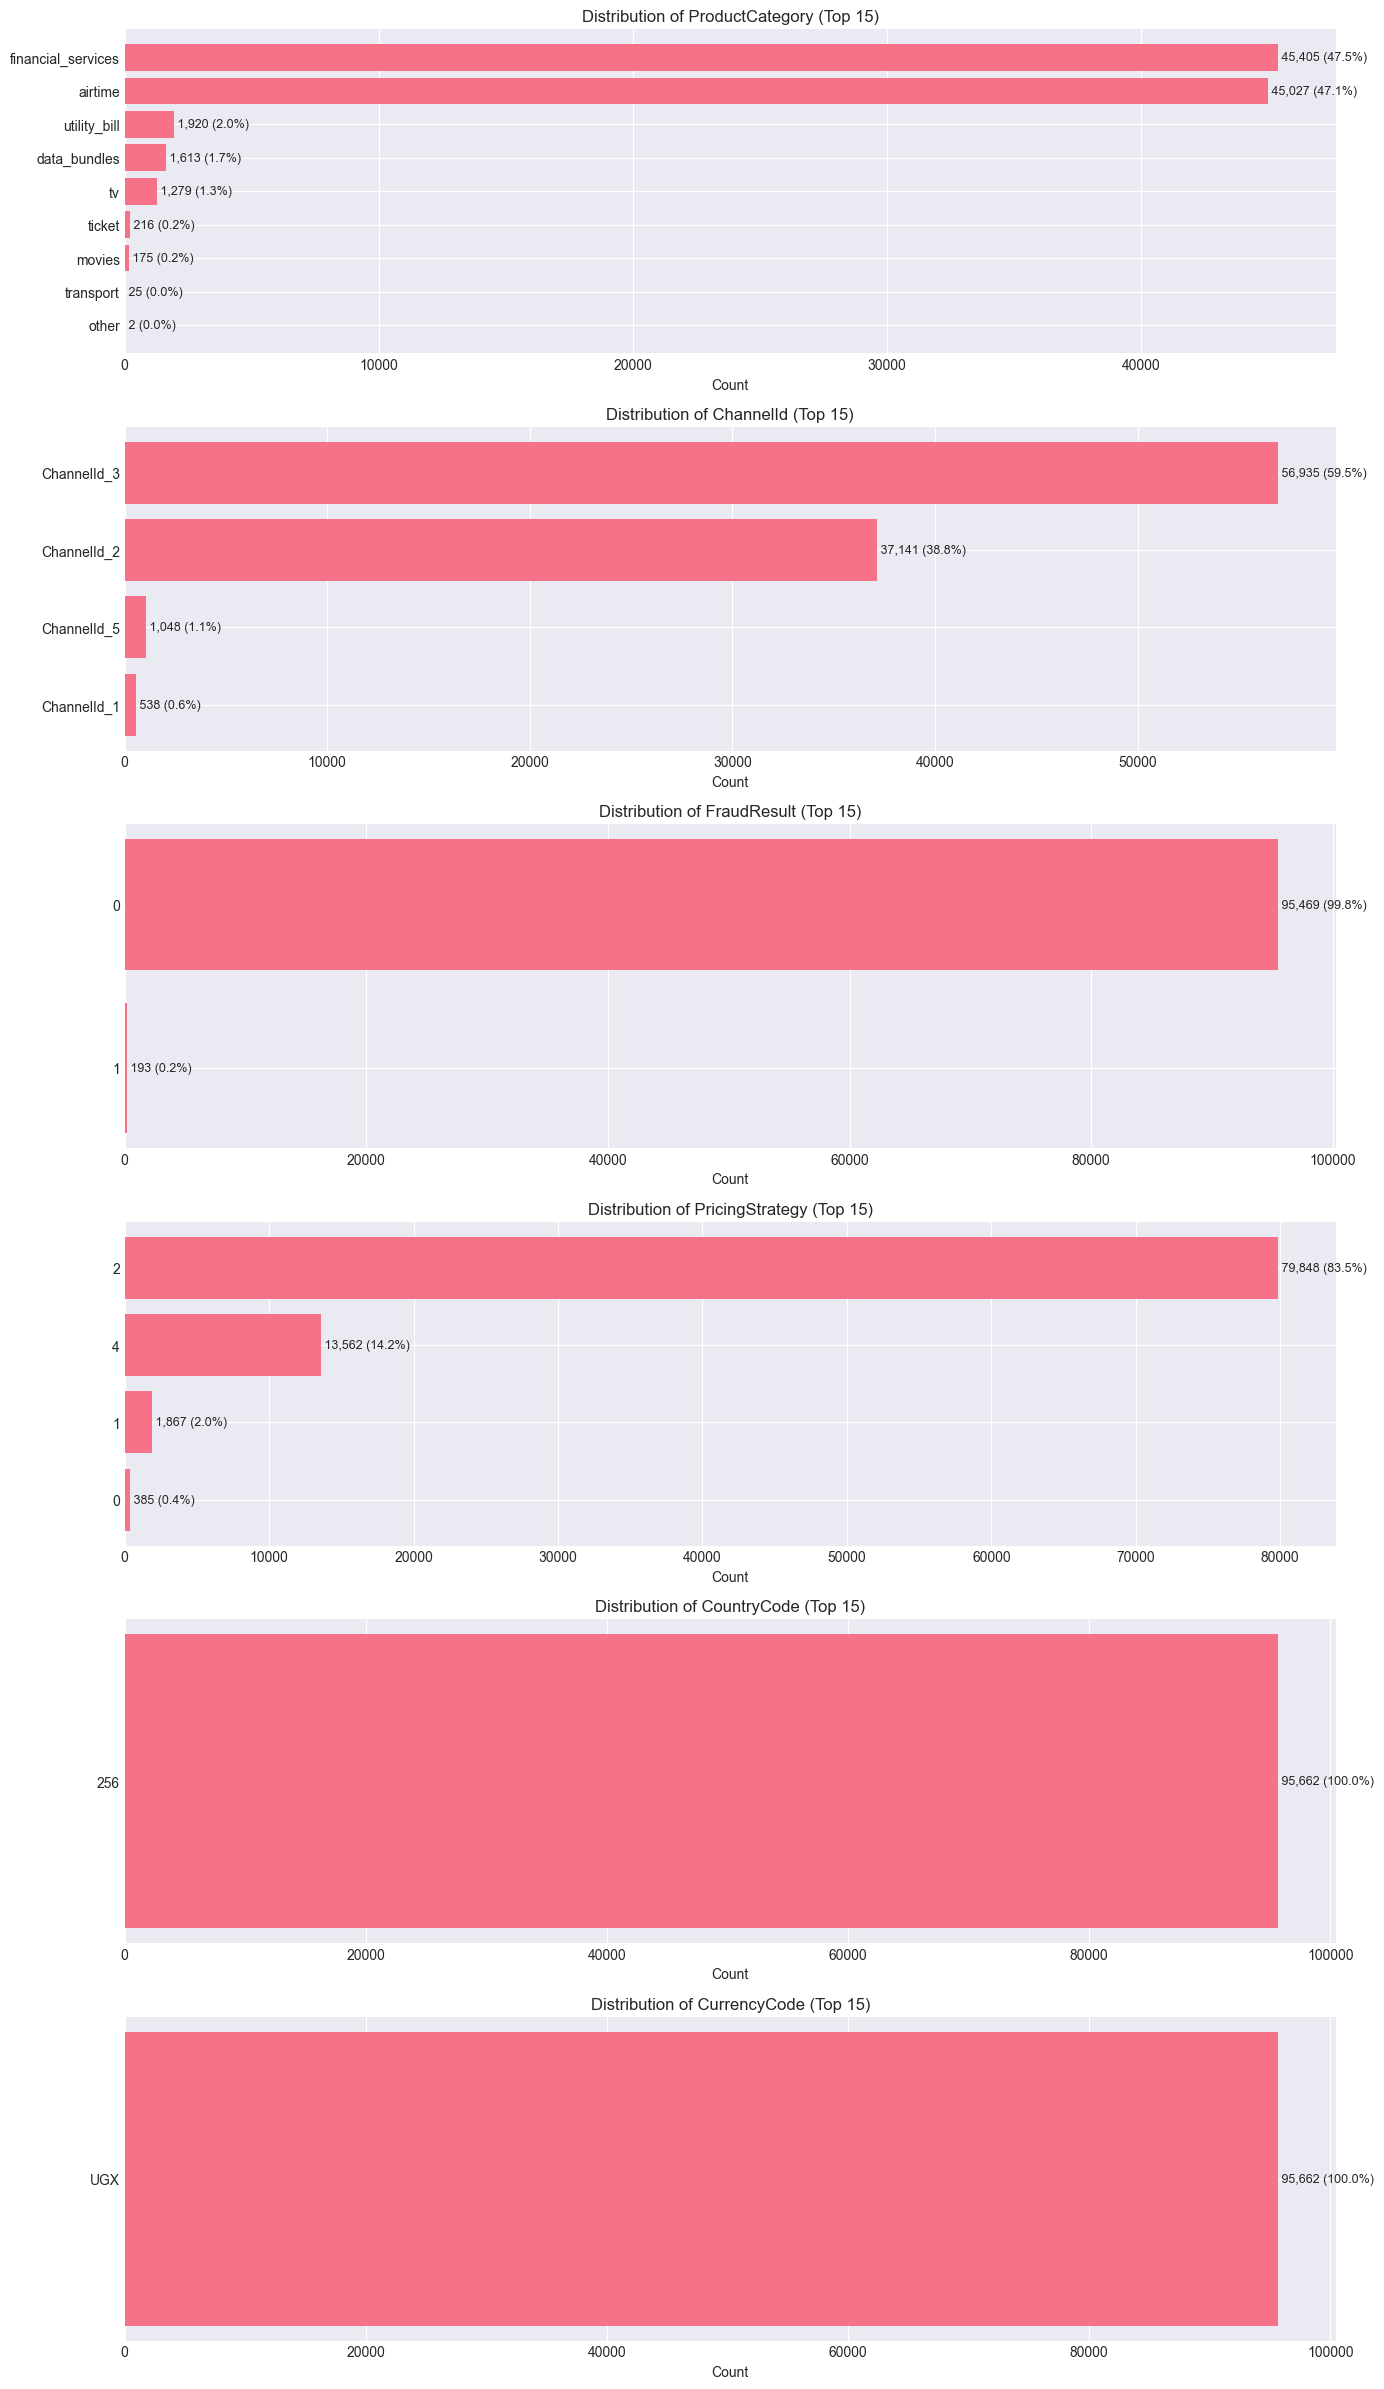

In [22]:
# Select key categorical features
key_categorical = ['ProductCategory', 'ChannelId', 'FraudResult', 
                   'PricingStrategy', 'CountryCode', 'CurrencyCode']

# Filter to existing columns
key_categorical = [col for col in key_categorical if col in df.columns]

fig, axes = plt.subplots(len(key_categorical), 1, 
                         figsize=(14, 4*len(key_categorical)))
if len(key_categorical) == 1:
    axes = [axes]

for idx, col in enumerate(key_categorical):
    value_counts = df[col].value_counts().head(15)
    
    axes[idx].barh(range(len(value_counts)), value_counts.values)
    axes[idx].set_yticks(range(len(value_counts)))
    axes[idx].set_yticklabels(value_counts.index)
    axes[idx].set_xlabel('Count')
    axes[idx].set_title(f'Distribution of {col} (Top 15)')
    axes[idx].invert_yaxis()
    
    # Add percentage labels
    total = value_counts.sum()
    for i, v in enumerate(value_counts.values):
        axes[idx].text(v, i, f' {v:,} ({v/total*100:.1f}%)', 
                      va='center', fontsize=9)
    
    print(f"\n{col} Distribution:")
    print(value_counts.head(10))
    print(f"  Total unique values: {df[col].nunique()}")

plt.tight_layout()
plt.show()

In [23]:
## 5. Correlation Analysis

print("\n" + "="*80)
print("CORRELATION ANALYSIS")
print("="*80)


CORRELATION ANALYSIS


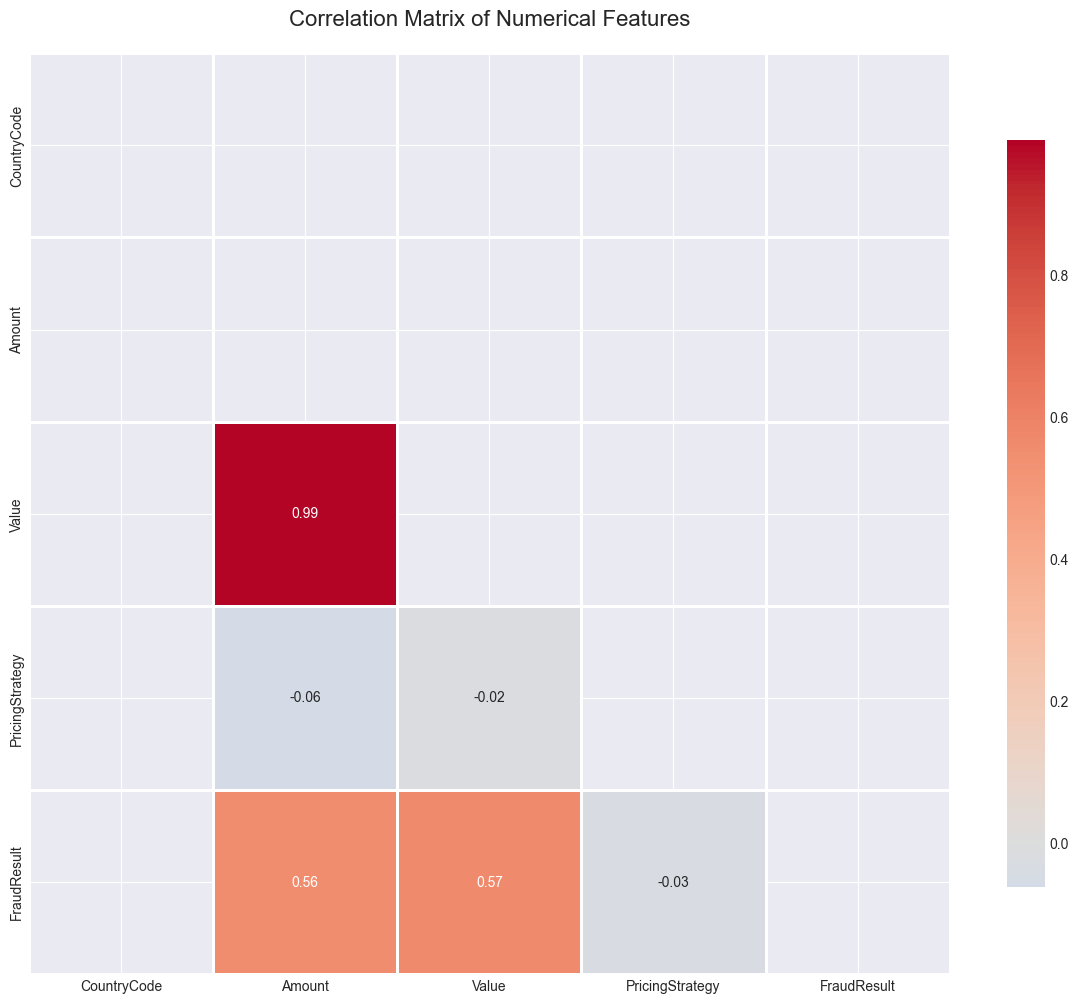


High Correlations (|r| > 0.5):
Feature 1   Feature 2  Correlation
   Amount       Value     0.989692
    Value FraudResult     0.566739
   Amount FraudResult     0.557370


In [24]:
# Select numerical columns for correlation
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()

# Remove ID columns from correlation analysis
id_columns = ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 
              'CustomerId', 'ProviderId', 'ProductId']
numerical_features = [col for col in numerical_features if col not in id_columns]

if len(numerical_features) > 1:
    # Calculate correlation matrix
    corr_matrix = df[numerical_features].corr()
    
    # Plot correlation heatmap
    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', 
                cmap='coolwarm', center=0, square=True, 
                linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Matrix of Numerical Features', fontsize=16, pad=20)
    plt.tight_layout()
    plt.show()
    
    # Print high correlations
    print("\nHigh Correlations (|r| > 0.5):")
    high_corr = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > 0.5:
                high_corr.append({
                    'Feature 1': corr_matrix.columns[i],
                    'Feature 2': corr_matrix.columns[j],
                    'Correlation': corr_matrix.iloc[i, j]
                })
    
    if high_corr:
        high_corr_df = pd.DataFrame(high_corr).sort_values(
            'Correlation', key=abs, ascending=False)
        print(high_corr_df.to_string(index=False))
    else:
        print("No high correlations found (|r| > 0.5)")

In [25]:
## 6. Identifying Missing Values

print("\n" + "="*80)
print("MISSING VALUES ANALYSIS")
print("="*80)

# Calculate missing values
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})
missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values(
    'Missing_Percentage', ascending=False)

if len(missing_data) > 0:
    print("\nMissing Values Summary:")
    print(missing_data.to_string(index=False))
    
    # Visualize missing values
    plt.figure(figsize=(12, 6))
    plt.barh(missing_data['Column'], missing_data['Missing_Percentage'])
    plt.xlabel('Missing Percentage (%)')
    plt.title('Missing Values by Feature')
    plt.gca().invert_yaxis()
    
    for i, (col, pct) in enumerate(zip(missing_data['Column'], 
                                       missing_data['Missing_Percentage'])):
        plt.text(pct, i, f' {pct:.1f}%', va='center')
    
    plt.tight_layout()
    plt.show()
    
    # Missing value patterns
    print("\nMissing Value Patterns:")
    print(df.isnull().sum().sum(), "total missing values")
    
else:
    print("\n✓ No missing values found in the dataset!")


MISSING VALUES ANALYSIS

✓ No missing values found in the dataset!


In [26]:
## 7. Outlier Detection

print("\n" + "="*80)
print("OUTLIER DETECTION")
print("="*80)


OUTLIER DETECTION



Amount:
  Q1 (25th percentile): -50.00
  Q3 (75th percentile): 2800.00
  IQR: 2850.00
  Lower Bound: -4325.00
  Upper Bound: 7075.00
  Outliers: 24,441 (25.55%)
  Z-score outliers (|z| > 3): 269

Value:
  Q1 (25th percentile): 275.00
  Q3 (75th percentile): 5000.00
  IQR: 4725.00
  Lower Bound: -6812.50
  Upper Bound: 12087.50
  Outliers: 9,021 (9.43%)
  Z-score outliers (|z| > 3): 269


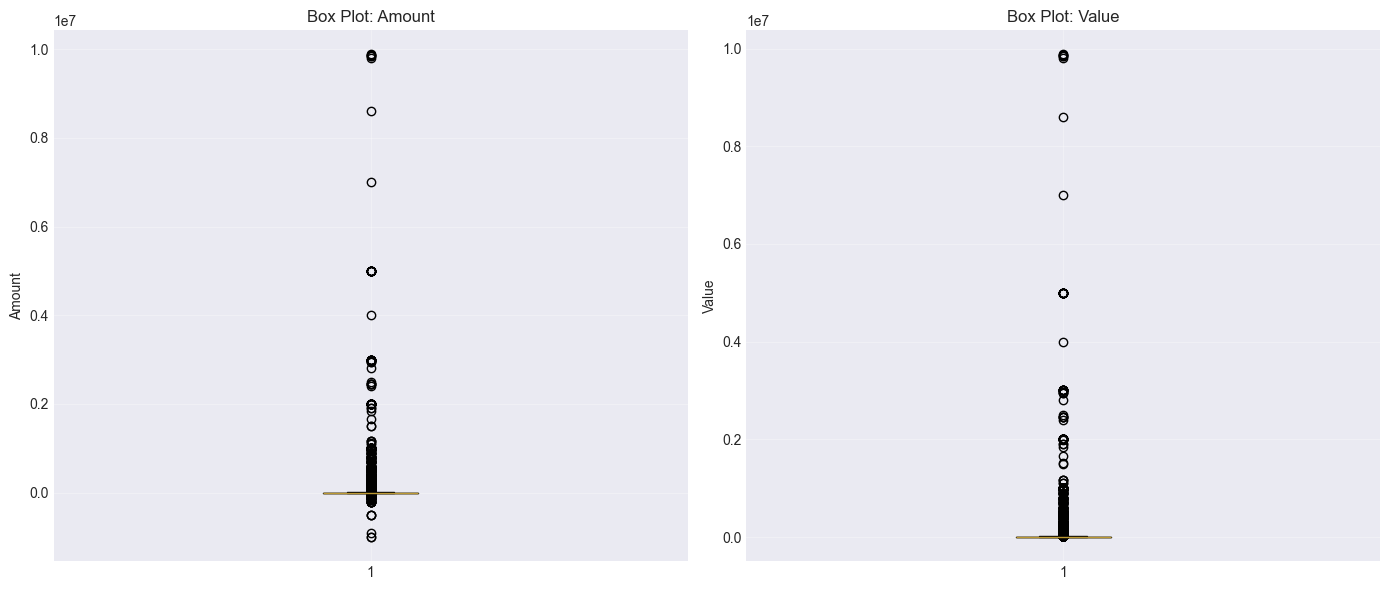

In [27]:
# Analyze outliers for numerical features
numerical_features = ['Amount', 'Value']  # Add other relevant columns

for col in numerical_features:
    if col not in df.columns:
        continue
        
    # Calculate IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_pct = (len(outliers) / len(df)) * 100
    
    print(f"\n{col}:")
    print(f"  Q1 (25th percentile): {Q1:.2f}")
    print(f"  Q3 (75th percentile): {Q3:.2f}")
    print(f"  IQR: {IQR:.2f}")
    print(f"  Lower Bound: {lower_bound:.2f}")
    print(f"  Upper Bound: {upper_bound:.2f}")
    print(f"  Outliers: {len(outliers):,} ({outlier_pct:.2f}%)")
    
    # Z-score method
    z_scores = np.abs(stats.zscore(df[col].dropna()))
    z_outliers = len(z_scores[z_scores > 3])
    print(f"  Z-score outliers (|z| > 3): {z_outliers:,}")

# Visualize outliers
fig, axes = plt.subplots(1, len(numerical_features), 
                         figsize=(7*len(numerical_features), 6))
if len(numerical_features) == 1:
    axes = [axes]

for idx, col in enumerate(numerical_features):
    if col not in df.columns:
        continue
    
    axes[idx].boxplot(df[col].dropna(), vert=True)
    axes[idx].set_title(f'Box Plot: {col}')
    axes[idx].set_ylabel(col)
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


TIME-BASED ANALYSIS

Time Range: 2018-11-15 02:18:49+00:00 to 2019-02-13 10:01:28+00:00
Duration: 90 days


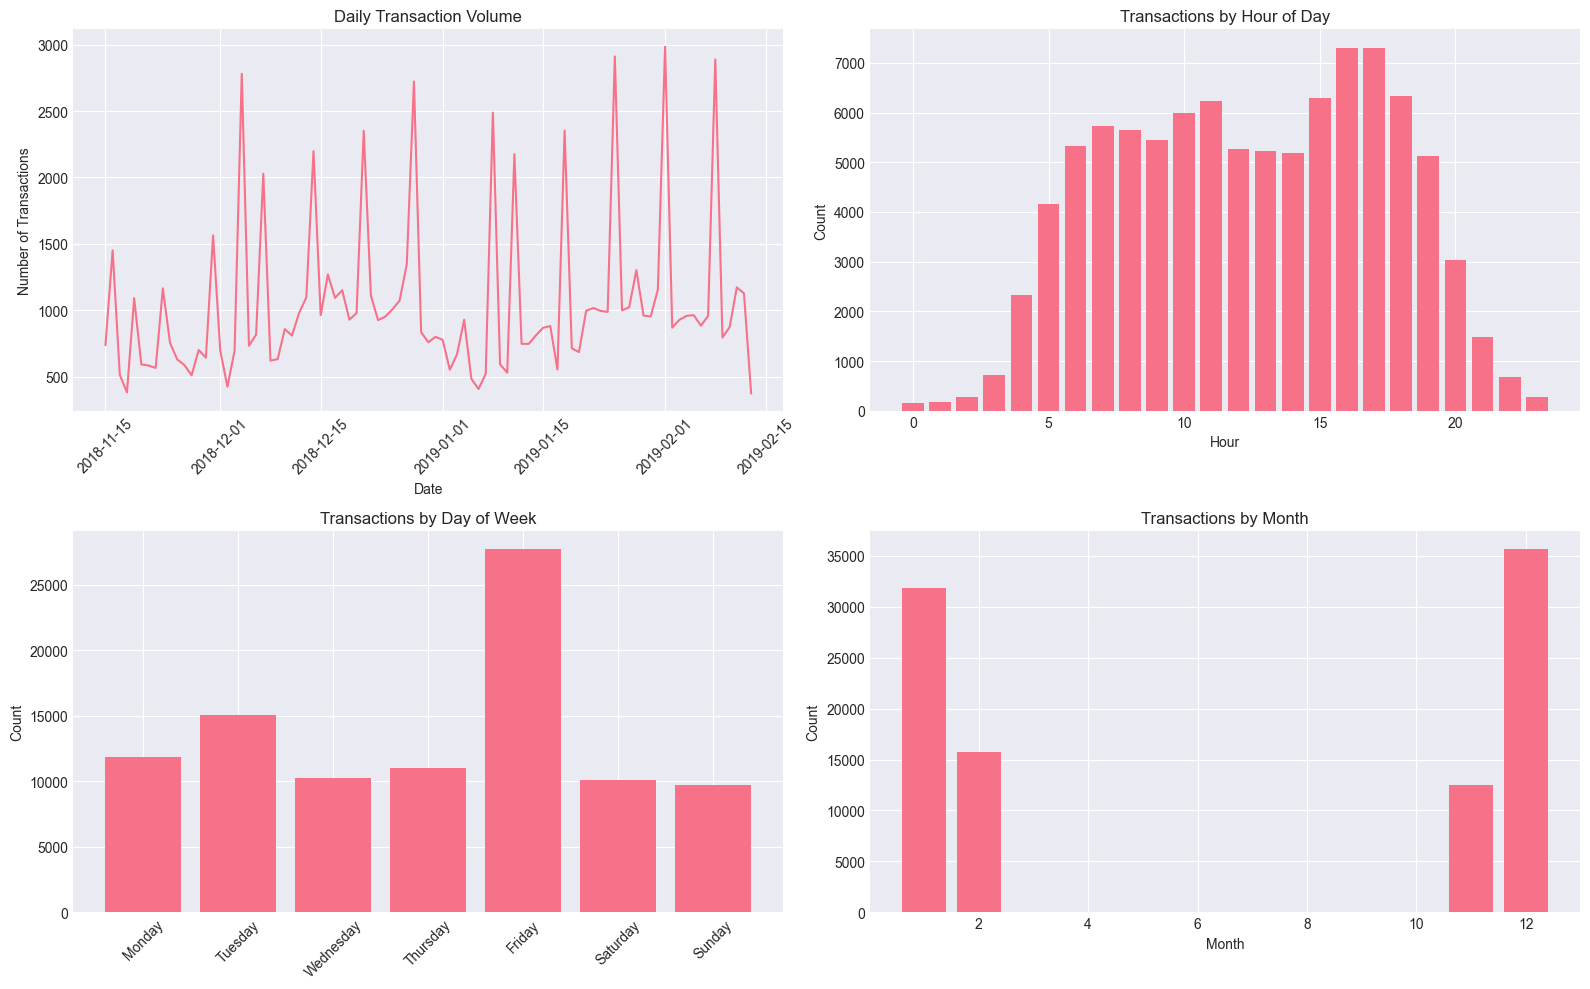

In [28]:
## 8. Time-Based Analysis (if applicable)

if 'TransactionStartTime' in df.columns:
    print("\n" + "="*80)
    print("TIME-BASED ANALYSIS")
    print("="*80)
    
    # Convert to datetime
    df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])
    
    # Extract time features
    df['TransactionDate'] = df['TransactionStartTime'].dt.date
    df['TransactionHour'] = df['TransactionStartTime'].dt.hour
    df['TransactionDayOfWeek'] = df['TransactionStartTime'].dt.day_name()
    df['TransactionMonth'] = df['TransactionStartTime'].dt.month
    
    print(f"\nTime Range: {df['TransactionStartTime'].min()} to {df['TransactionStartTime'].max()}")
    print(f"Duration: {(df['TransactionStartTime'].max() - df['TransactionStartTime'].min()).days} days")
    
    # Transactions over time
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    
    # Daily transactions
    daily_trans = df.groupby('TransactionDate').size()
    axes[0, 0].plot(daily_trans.index, daily_trans.values)
    axes[0, 0].set_title('Daily Transaction Volume')
    axes[0, 0].set_xlabel('Date')
    axes[0, 0].set_ylabel('Number of Transactions')
    axes[0, 0].tick_params(axis='x', rotation=45)
    
    # Hourly distribution
    hourly_trans = df['TransactionHour'].value_counts().sort_index()
    axes[0, 1].bar(hourly_trans.index, hourly_trans.values)
    axes[0, 1].set_title('Transactions by Hour of Day')
    axes[0, 1].set_xlabel('Hour')
    axes[0, 1].set_ylabel('Count')
    
    # Day of week
    dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 
                 'Friday', 'Saturday', 'Sunday']
    dow_trans = df['TransactionDayOfWeek'].value_counts().reindex(dow_order)
    axes[1, 0].bar(range(7), dow_trans.values)
    axes[1, 0].set_xticks(range(7))
    axes[1, 0].set_xticklabels(dow_order, rotation=45)
    axes[1, 0].set_title('Transactions by Day of Week')
    axes[1, 0].set_ylabel('Count')
    
    # Monthly distribution
    monthly_trans = df['TransactionMonth'].value_counts().sort_index()
    axes[1, 1].bar(monthly_trans.index, monthly_trans.values)
    axes[1, 1].set_title('Transactions by Month')
    axes[1, 1].set_xlabel('Month')
    axes[1, 1].set_ylabel('Count')
    
    plt.tight_layout()
    plt.show()